<h3>Basic Matplotlib Diagrams 2</h3>

This notebooks continues to discuss how to plot basic diagrams in Matplotlib.

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)

Matplotlib version: 3.3.3
NumPy version: 1.19.4


<strong>We can draw a scatter plot with the 'scatter()' function. We need 2 arrays of the same length.</strong>

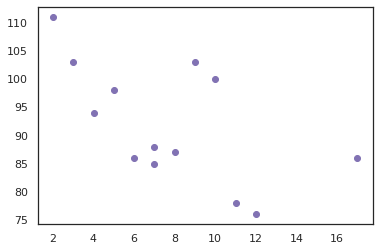

In [101]:
x = [5,7,8,7,2,17,3,9,4,11,12,10,6]
y = [98,85,87,88,111,86,103,103,94,78,76,100,86]

plt.scatter(x, y, color='m')
plt.show()

<strong>We can draw a line of linear regression.</strong>

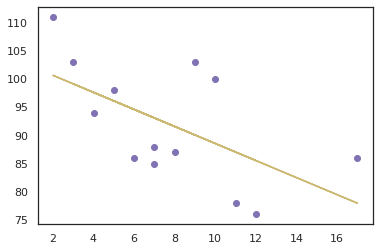

In [102]:
from scipy import stats

x = [5,7,8,7,2,17,3,9,4,11,12,10,6]
y = [98,85,87,88,111,86,103,103,94,78,76,100,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, color='m')
plt.plot(x, mymodel, color='y')
plt.show()

<strong>Here is another scatterplot with 2 arrays that may not fit a linear regression well.</strong>

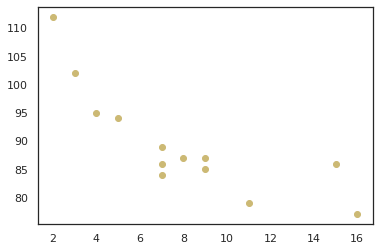

In [103]:
x = np.array([4,7,8,7,2,15,3,9,5,11,16,9,7])
y = np.array([95,86,87,84,112,86,102,87,94,79,77,85,89])

plt.scatter(x, y, color='y')

plt.show()

<strong>If the 2 arrays represented real-life data, we could use the polynomial regression method from NumPy to explore the relationship between the variables x and y.</strong>

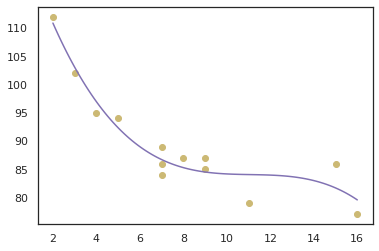

In [104]:
x = np.array([4,7,8,7,2,15,3,9,5,11,16,9,7])
y = np.array([95,86,87,84,112,86,102,87,94,79,77,85,89])

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(2, 16, 112)

plt.scatter(x, y, color='y')
plt.plot(myline, mymodel(myline), color='m')

plt.show()

<strong>The relationship between the variables x and y can be measured with the r-squared value using the 'r2_score()' function from Scikit-learn. The r-squared values range from 0 to 1, where 0 means not related, and 1 means 100% related.</strong>

In [105]:
from sklearn.metrics import r2_score

x = np.array([4,7,8,7,2,15,3,9,5,11,16,9,7])
y = np.array([95,86,87,84,112,86,102,87,94,79,77,85,89])

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.922929632076443


<strong>We can now predict the y value of any number on the x axis.</strong>

In [106]:
predict = mymodel(10)

print(predict)

84.16827143400192


<strong>We can designate a color for each dot by defining an array of colors as value for the 'c' argument.</strong>

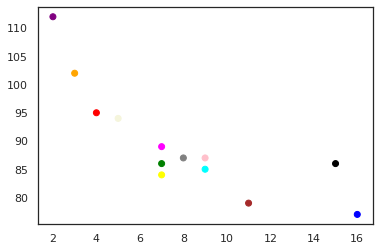

In [107]:
x = np.array([4,7,8,7,2,15,3,9,5,11,16,9,7])
y = np.array([95,86,87,84,112,86,102,87,94,79,77,85,89])

colors = np.array(["red","green","gray","yellow","purple",
                   "black","orange","pink","beige","brown",
                   "blue","cyan","magenta"])

plt.scatter(x, y, c=colors)
plt.show()

<strong>We can also utilize one of the many built-in color maps available in Matplotlib.</strong>

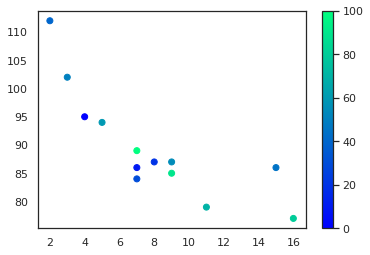

In [108]:
x = np.array([4,7,8,7,2,15,3,9,5,11,16,9,7])
y = np.array([95,86,87,84,112,86,102,87,94,79,77,85,89])

colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

plt.scatter(x, y, c=colors, cmap='winter')
plt.colorbar()
plt.show()

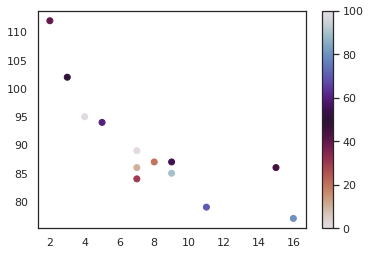

In [109]:
x = np.array([4,7,8,7,2,15,3,9,5,11,16,9,7])
y = np.array([95,86,87,84,112,86,102,87,94,79,77,85,89])

colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

plt.scatter(x, y, c=colors, cmap='twilight_r')
plt.colorbar()
plt.show()

<strong>We can change the size of the dots with the 's' argument, and we can adjust the transparency of the dots with the 'alpha' argument.</strong>

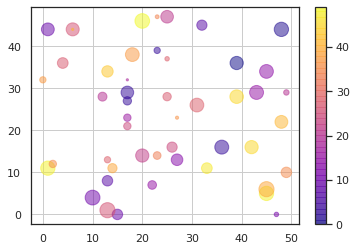

In [110]:
x = np.random.randint(50, size=(50))
y = np.random.randint(50, size=(50))

colors = np.random.randint(50, size=(50))
sizes = 5 * np.random.randint(50, size=(50))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='plasma')
plt.grid(True)
plt.colorbar()
plt.show()

<strong>The Seaborn data visualization library provides more options to plot regression models.</strong>

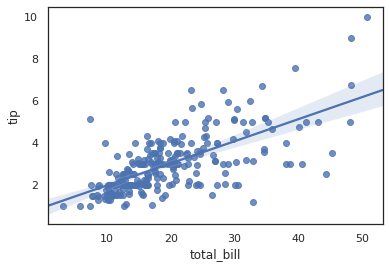

In [111]:
import seaborn as sns

sns.set(color_codes=True)
tips = sns.load_dataset("tips")

sns.set_style("white")
sns.regplot(x="total_bill", y="tip", data=tips);

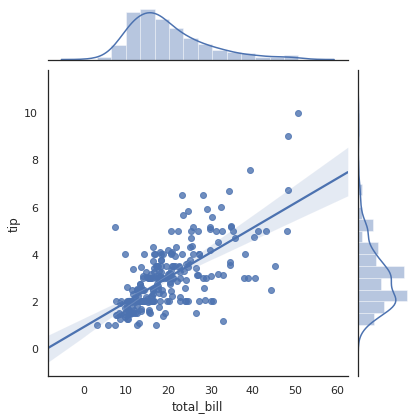

In [112]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

<strong>An easy way to draw a bar graph in Matplotlib is to use the 'bar()' or the 'barh()' function.</strong>

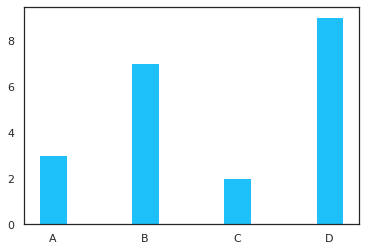

In [113]:
x = np.array(["A", "B", "C", "D"])
y = np.array([3, 7, 2, 9])

plt.bar(x,y, width=0.3, color="#1dc0f8")
plt.show()

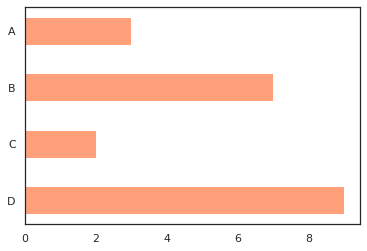

In [114]:
x = np.array(["D", "C", "B", "A"])
y = np.array([9, 2, 7, 3])

plt.barh(x,y, height=0.5, color="#FFA07A", align="center")
plt.show()

<strong>Here is an example for a stacked bar chart.</strong>

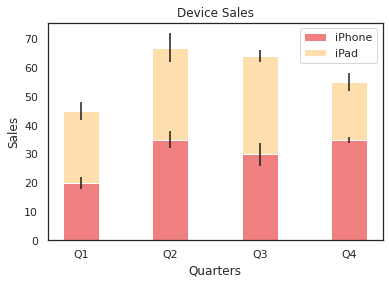

In [115]:
labels = ['Q1', 'Q2', 'Q3', 'Q4']
iphone_means = [20, 35, 30, 35]
ipad_means = [25, 32, 34, 20]
iphone_std = [2, 3, 4, 1]
ipad_std = [3, 5, 2, 3]
width = 0.4

fig, ax = plt.subplots()

ax.bar(labels, iphone_means, width, yerr=iphone_std, color="#F08080", label='iPhone')
ax.bar(labels, ipad_means, width, yerr=ipad_std, bottom=iphone_means, color="#FFDEAD", label='iPad')

plt.xlabel('Quarters')
plt.ylabel('Sales')
plt.title("Device Sales")

ax.legend()
plt.show()

<strong>We can create a histogram with the 'hist()' function. We use NumPy to generate a random array of values: the values concentrate around 100, the standard deviation is 5, and we create 250 values.</strong>

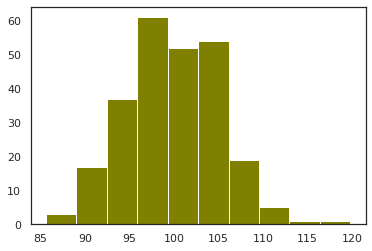

In [116]:
x = np.random.normal(100, 5, 250)

plt.hist(x, color="#808000")
plt.show()

<strong>In order to draw a pie chart, we use the 'pie()' function.</strong>

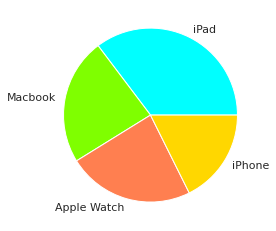

In [117]:
y = np.array([30, 20, 20, 15])

mylabels = ["iPad", "Macbook", "Apple Watch", "iPhone"]
mycolors = ["aqua", "chartreuse", "#FF7F50", "#FFD700"]

plt.pie(y, labels=mylabels, colors=mycolors, startangle=0)
plt.show()

<strong>We can make a wedge stand out with the 'explode' parameter, and add a shadow to the wedges with the 'shadows' parameter.</strong>

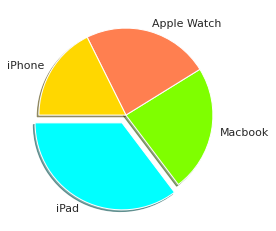

In [118]:
y = np.array([30, 20, 20, 15])

mylabels = ["iPad", "Macbook", "Apple Watch", "iPhone"]
mycolors = ["aqua", "chartreuse", "#FF7F50", "#FFD700"]
myexplode = [0.1, 0, 0, 0]

plt.pie(y, labels=mylabels, colors=mycolors, explode=myexplode, shadow=True, startangle=180)
plt.show()

<strong>Below is a simple sinus diagram.</strong>

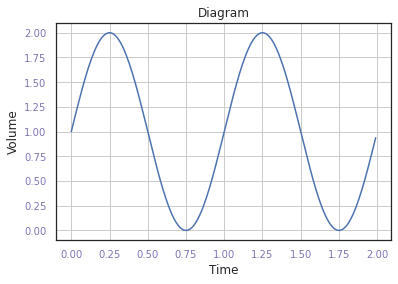

In [119]:
x = np.arange(0.0, 2.0, 0.01)
y = 1 + np.sin(2 * np.pi * x)

plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title("Diagram")

plt.grid()
plt.tick_params(labelcolor='m', labelsize='small', width=10)
plt.show()

<strong>We can develop more sophisticated and informative graphics with the Seaborn data visualization library, which is built on Matplotlib.</strong>

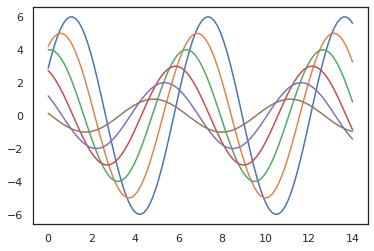

In [120]:
import pandas as pd
import seaborn as sns; sns.set()

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sns.set_style("white")
sinplot()

<strong>We can create a basic 3D plot with the following code in Matplotlib.</strong>

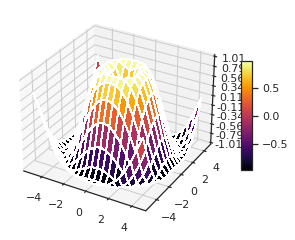

In [121]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# We first make the data.
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Then we plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='inferno', linewidth=1, antialiased=False)

# Then we customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter will be used automatically.
ax.zaxis.set_major_formatter('{x:.02f}')

# We finally add a color bar that maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()